# Modèles de ML et de DL sur le dataset heure par heure

In [19]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from numpy import concatenate

In [3]:
# Ouverture du document et suppression de la première ligne
df = pd.read_csv('../../data/dataset_LogETL_LogServer.csv')
df.drop(index=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()


,Date et heure,Column Name Error,Connection Timeout Error,Create TABLE Error,Date Format Error,Field Size Error,Guidez Atelier Error,Index Error (similar to unique index error),Object Reference Error,Other Error,...,Processeur 1(%),Processeur 2(%),Processeur 3(%),Processeur 4(%),Processeur 5(%),Processeur 6(%),Processeur 7(%),Processeur 8(%),Temps mort cpu(%),Couverture cpu(%)
0,2024-08-25 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.6667,17.3333,30.5833,25.5000,49.0833,13.1667,32.9167,14.1667,0.0,4000.0
1,2024-08-25 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5000,8.5833,45.5000,19.0833,7.7500,2.5000,44.5833,8.2500,0.0,4000.0
2,2024-08-25 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0000,13.1667,65.5833,19.2500,9.7500,15.1667,23.8333,16.0000,0.0,4000.0
3,2024-08-25 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0833,0.0833,0.0833,1.3333,0.1667,0.1667,0.0833,0.3333,0.0,4000.0
4,2024-08-25 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0833,0.1667,0.6667,1.5833,0.0833,0.1667,0.4167,0.4167,0.0,4000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 97 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Date et heure                                    1248 non-null   object 
 1   Column Name Error                                1248 non-null   float64
 2   Connection Timeout Error                         1248 non-null   float64
 3   Create TABLE Error                               1248 non-null   float64
 4   Date Format Error                                1248 non-null   float64
 5   Field Size Error                                 1248 non-null   float64
 6   Guidez Atelier Error                             1248 non-null   float64
 7   Index Error (similar to unique index error)      1248 non-null   float64
 8   Object Reference Error                           1248 non-null   float64
 9   Other Error                   

### Création de colonnes pour des features supplémentaires

In [5]:
df_modified = df

In [6]:
# Heure et jour de la semaine
df_modified['Date et heure'] = pd.to_datetime(df_modified['Date et heure'])
df_modified['jour_semaine'] = df_modified['Date et heure'].dt.day_name()
df_modified['heure'] = df_modified['Date et heure'].dt.hour

In [7]:
# Stockage des colonnes de performance CPU dans une liste
server_performance_columns = df_modified.columns[87:95]

In [8]:
# Période de la journée
bins = [0, 6, 12, 18, 24]
labels = ['Nuit', 'Matin', 'Après-midi', 'Soir']
df_modified['Période du jour'] = pd.cut(df_modified['heure'], bins=bins, labels=labels, right=False)

# Moyenne mobile des performances des serveurs
df_modified['Moyenne mobile CPU'] = df_modified[server_performance_columns].mean(axis=1).rolling(window=3).mean()

# Écart-type des erreurs
df_modified['Écart-type erreurs'] = df_modified['Total_Errors'].rolling(window=3).std()

# Ratio des erreurs
df_modified['Ratio erreurs'] = df_modified['Total_Errors'] / (df_modified['Total_Errors'] + df_modified['nb_operations'])

# CPU Maximum
df_modified['CPU Maximum'] = df_modified[['Processeur 1(%)', 'Processeur 2(%)', 'Processeur 3(%)', 'Processeur 4(%)',
                            'Processeur 5(%)', 'Processeur 6(%)', 'Processeur 7(%)', 'Processeur 8(%)']].max(axis=1)

In [9]:
df_modified[['Moyenne mobile CPU', 'Écart-type erreurs', 'Ratio erreurs']] = df_modified[['Moyenne mobile CPU', 'Écart-type erreurs', 'Ratio erreurs']].fillna(0)

In [10]:
df_modified.head()

,Date et heure,Column Name Error,Connection Timeout Error,Create TABLE Error,Date Format Error,Field Size Error,Guidez Atelier Error,Index Error (similar to unique index error),Object Reference Error,Other Error,...,Processeur 8(%),Temps mort cpu(%),Couverture cpu(%),jour_semaine,heure,Période du jour,Moyenne mobile CPU,Écart-type erreurs,Ratio erreurs,CPU Maximum
0,2024-08-25 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.1667,0.0,4000.0,Sunday,0,Nuit,0.000000,0.0,0.0,49.0833
1,2024-08-25 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.2500,0.0,4000.0,Sunday,1,Nuit,0.000000,0.0,0.0,45.5000
2,2024-08-25 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0000,0.0,4000.0,Sunday,2,Nuit,21.121525,0.0,0.0,65.5833
3,2024-08-25 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3333,0.0,4000.0,Sunday,3,Nuit,13.159712,0.0,0.0,1.3333
4,2024-08-25 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4167,0.0,4000.0,Sunday,4,Nuit,7.527775,0.0,0.0,1.5833


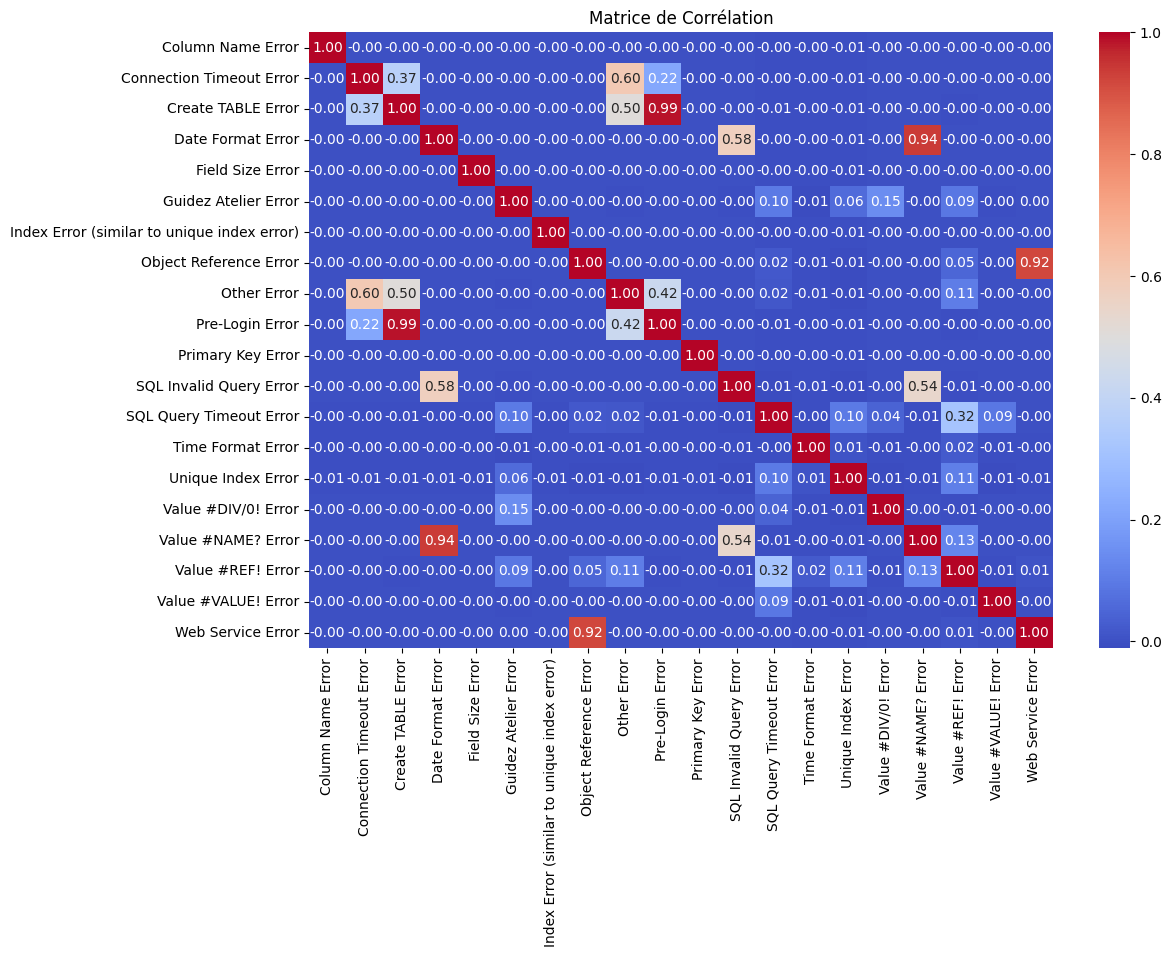

Features sélectionnées : Index(['Field Size Error', 'SQL Query Timeout Error', 'Time Format Error',
       'Unique Index Error', 'Tous les jours', 'nb_operations', 'rows_added',
       'rows_deleted', 'Écart-type erreurs', 'Ratio erreurs'],
      dtype='object')


In [11]:
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Séparation des features et de la cible
X = df_modified.drop(columns=['Total_Errors', 'Date et heure'])
y = df_modified['Total_Errors']

# Encodage des colonnes
X_encoded = pd.get_dummies(X, columns=['jour_semaine', 'Période du jour'], drop_first=True)

# Sélection d'un sous-ensemble de colonnes pour la matrice de corrélation
subset_columns = X_encoded.columns[:20]  # Sélectionnez les 20 premières colonnes pour la visualisation
correlation_matrix = X_encoded[subset_columns].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

# Sélection des features avec Random Forest
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)  # Ajustez le nombre de features à sélectionner
fit = rfe.fit(X_encoded, y)

# Afficher les features sélectionnées
selected_features = X_encoded.columns[fit.support_]
print("Features sélectionnées :", selected_features)

Précision du modèle : 0.988
Rapport de classification :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       223
         1.0       0.88      1.00      0.94        15
         2.0       0.86      0.86      0.86         7
         3.0       1.00      0.67      0.80         3
         4.0       1.00      1.00      1.00         1
    197560.0       0.00      0.00      0.00         1

    accuracy                           0.99       250
   macro avg       0.79      0.75      0.77       250
weighted avg       0.98      0.99      0.99       250



/Users/guillaumeramirez/pythonenvs/deepenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guillaumeramirez/pythonenvs/deepenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guillaumeramirez/pythonenvs/deepenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

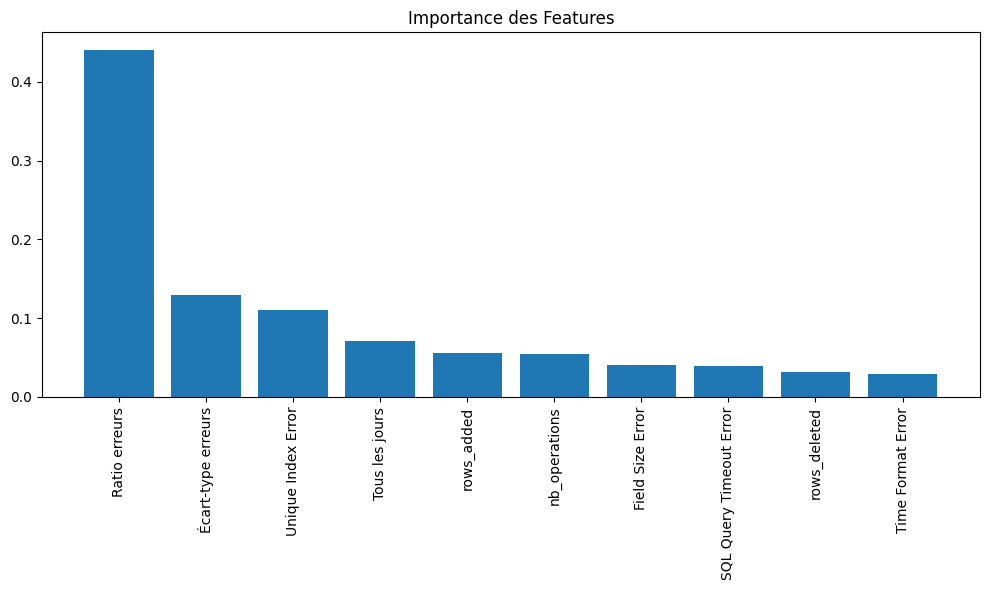

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Séparation des données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded[selected_features], y, test_size=0.2, random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Importance des features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Tracer l'importance des features
plt.figure(figsize=(10, 6))
plt.title("Importance des Features")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [selected_features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

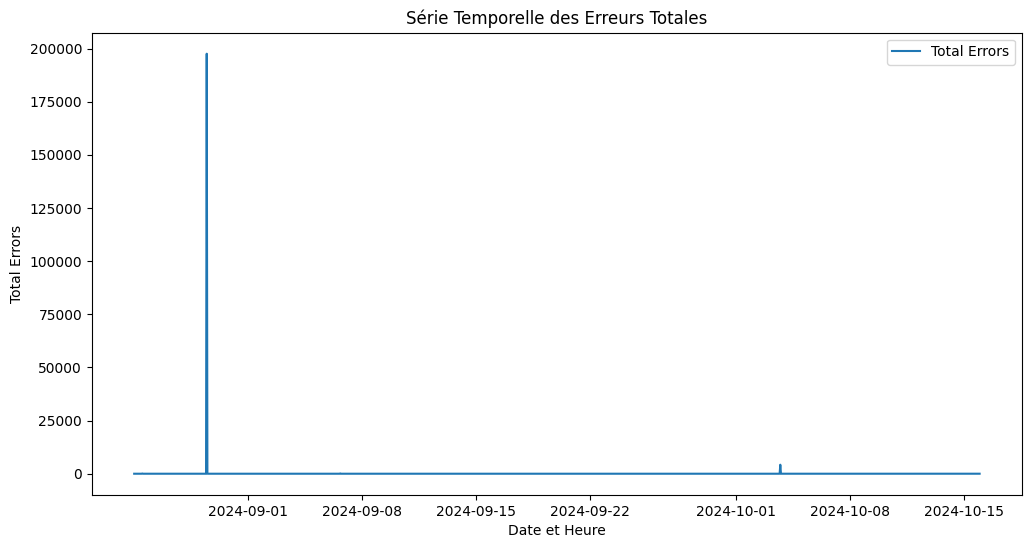

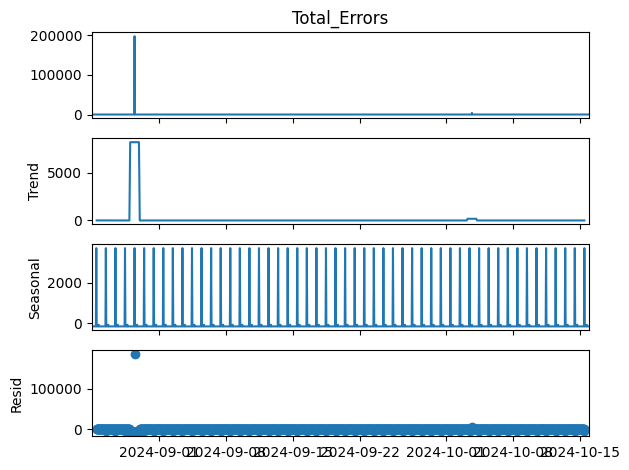

In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Indexation temporelle
df_modified.set_index('Date et heure', inplace=True)

# Visualisation de la série temporelle pour total_errors
plt.figure(figsize=(12, 6))
plt.plot(df_modified['Total_Errors'], label='Total Errors')
plt.title('Série Temporelle des Erreurs Totales')
plt.xlabel('Date et Heure')
plt.ylabel('Total Errors')
plt.legend()
plt.show()

# Décomposition saisonnière
decomposition = seasonal_decompose(df_modified['Total_Errors'], model='additive', period=24)
decomposition.plot()
plt.show()

Modèle ARIMA - Erreur Quadratique Moyenne (MSE): 1.596


/Users/guillaumeramirez/pythonenvs/deepenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/guillaumeramirez/pythonenvs/deepenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/guillaumeramirez/pythonenvs/deepenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


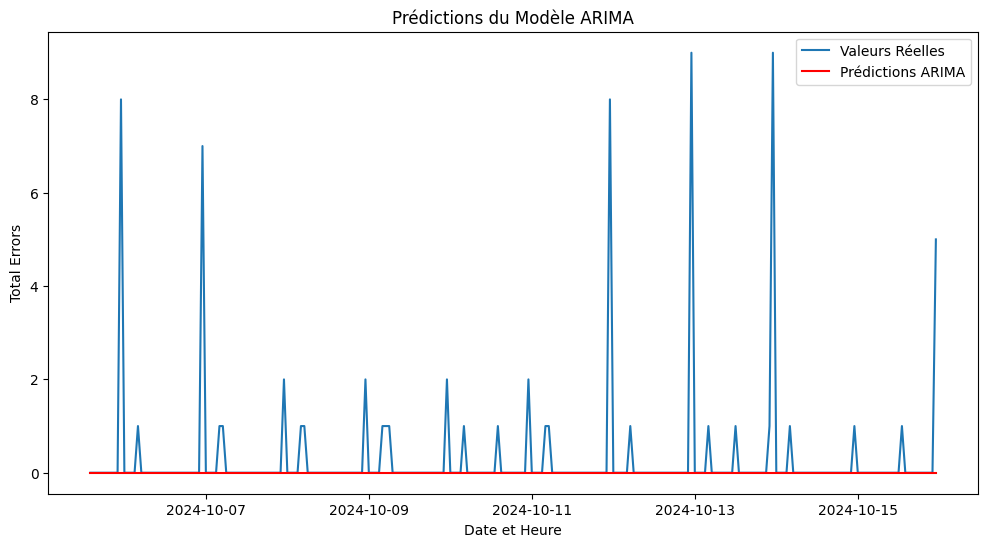

          Réelles      Prédites
count  250.000000  2.500000e+02
mean     0.292000 -5.491148e-18
std      1.231586  1.943617e-19
min      0.000000 -7.702561e-18
25%      0.000000 -5.476563e-18
50%      0.000000 -5.476563e-18
75%      0.000000 -5.476563e-18
max      9.000000 -4.403911e-18


In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Séparation des données d'entraînement et de test
train_size = int(len(df_modified) * 0.8)
train, test = df_modified['Total_Errors'][0:train_size], df_modified['Total_Errors'][train_size:]

# Entraînement du modèle ARIMA
model_arima = ARIMA(train, order=(5,1,0))  # Ajustez l'ordre du modèle
model_fit_arima = model_arima.fit()

# Prédiction
forecast_arima = model_fit_arima.forecast(steps=len(test))

# Évaluation
mse_arima = mean_squared_error(test, forecast_arima)
print(f'Modèle ARIMA - Erreur Quadratique Moyenne (MSE): {mse_arima}')

# Tracer les prédictions
plt.figure(figsize=(12, 6))
plt.plot(test, label='Valeurs Réelles')
plt.plot(test.index, forecast_arima, label='Prédictions ARIMA', color='red')
plt.title('Prédictions du Modèle ARIMA')
plt.xlabel('Date et Heure')
plt.ylabel('Total Errors')
plt.legend()
plt.show()

# Tableau des valeurs réelles vs prédites
comparison_arima = pd.DataFrame({'Réelles': test, 'Prédites': forecast_arima})
print(comparison_arima.describe())

/Users/guillaumeramirez/pythonenvs/deepenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


998/998 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.2042e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Modèle LSTM - Erreur Quadratique Moyenne (MSE): 1.3708791273383794


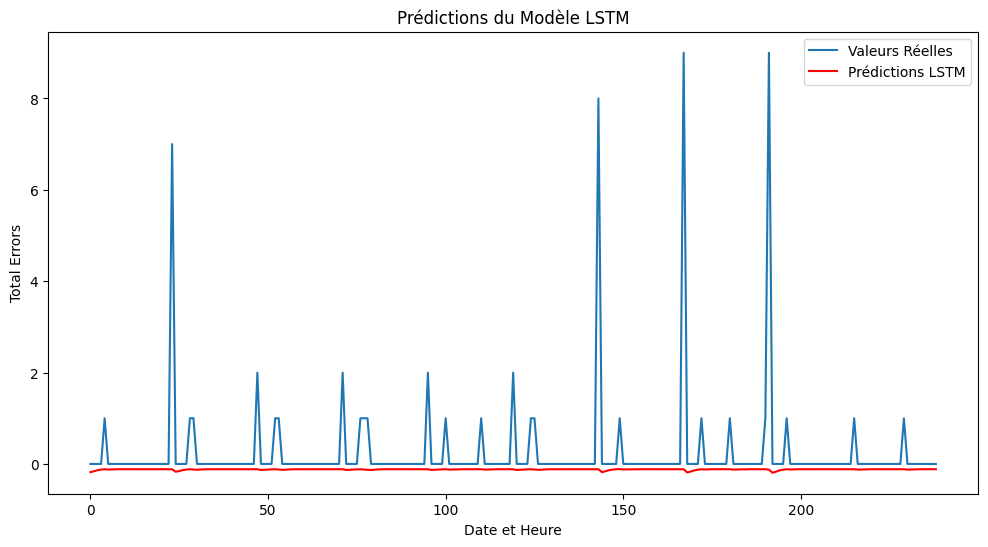

   Réelles  Prédites
0      0.0 -0.179208
1      0.0 -0.160441
2      0.0 -0.137626
3      0.0 -0.123275
4      1.0 -0.115915


In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_modified[['Total_Errors']])

# Préparation des données pour LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Séparation des données d'entraînement et de test
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Résilience des données pour LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Modèle LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model_lstm.fit(X_train, y_train, batch_size=1, epochs=1)

# Prédiction
predictions_lstm = model_lstm.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Évaluation
mse_lstm = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions_lstm)
print(f'Modèle LSTM - Erreur Quadratique Moyenne (MSE): {mse_lstm}')

# Tracer les prédictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Valeurs Réelles')
plt.plot(predictions_lstm, label='Prédictions LSTM', color='red')
plt.title('Prédictions du Modèle LSTM')
plt.xlabel('Date et Heure')
plt.ylabel('Total Errors')
plt.legend()
plt.show()

# Tableau des valeurs réelles vs prédites
comparison_lstm = pd.DataFrame({'Réelles': scaler.inverse_transform(y_test.reshape(-1, 1)).flatten(), 'Prédites': predictions_lstm.flatten()})
print(comparison_lstm.head())

In [21]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from pandas import DataFrame, concat
from math import sqrt
import matplotlib.pyplot as plt

# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
numeric_columns = df_modified.select_dtypes(include=['float64', 'int64']).columns
scaled_data = scaler.fit_transform(df_modified[numeric_columns])

# Fonction pour créer des séries temporelles
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Créer des séries temporelles
time_step = 10
reframed = series_to_supervised(scaled_data, time_step, 1)

# Supprimer les colonnes non pertinentes
reframed.drop(reframed.columns[[-1] + list(range(len(numeric_columns), len(reframed.columns)-1))], axis=1, inplace=True)

# Diviser les données en ensembles d'entraînement et de test
values = reframed.values
n_train_hours = int(len(values) * 0.8)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# Reshape des données pour LSTM
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Modèle LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Entraînement du modèle
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Prédiction et évaluation
yhat_train = model.predict(train_X)
train_X_reshaped = train_X.reshape((train_X.shape[0], train_X.shape[2]))

# Inverser le scaling pour la prévision (train)
inv_yhat_train = np.concatenate((yhat_train, train_X_reshaped[:, 1:]), axis=1)
inv_yhat_train = scaler.inverse_transform(inv_yhat_train)
inv_yhat_train = inv_yhat_train[:, 0]

# Inverser le scaling pour les valeurs réelles (train)
train_y = train_y.reshape((len(train_y), 1))
inv_y_train = np.concatenate((train_y, train_X_reshaped[:, 1:]), axis=1)
inv_y_train = scaler.inverse_transform(inv_y_train)[:, 0]

# Calculer le RMSE pour l'ensemble d'entraînement
rmse_train = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
print('Train RMSE: %.3f' % rmse_train)

# Prédictions sur le test set
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# Inverser le scaling pour la prévision (test)
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)[:, 0]

# Inverser le scaling pour les valeurs réelles (test)
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)[:, 0]

# Calculer le RMSE pour l'ensemble de test
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(inv_y_train, label='Valeurs réelles (train)')
plt.plot(inv_yhat_train, label='Prédictions (train)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Errors')
plt.title('Comparaison entre valeurs réelles et prédictions sur le train set')
plt.legend()
plt.show()

Epoch 1/50


/Users/guillaumeramirez/pythonenvs/deepenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 - 1s - 38ms/step - loss: 0.1502 - val_loss: 0.0663
Epoch 2/50
14/14 - 0s - 3ms/step - loss: 0.0980 - val_loss: 0.0832
Epoch 3/50
14/14 - 0s - 3ms/step - loss: 0.0663 - val_loss: 0.0479
Epoch 4/50
14/14 - 0s - 3ms/step - loss: 0.0529 - val_loss: 0.0551
Epoch 5/50
14/14 - 0s - 3ms/step - loss: 0.0503 - val_loss: 0.0534
Epoch 6/50
14/14 - 0s - 3ms/step - loss: 0.0473 - val_loss: 0.0413
Epoch 7/50
14/14 - 0s - 3ms/step - loss: 0.0403 - val_loss: 0.0322
Epoch 8/50
14/14 - 0s - 3ms/step - loss: 0.0409 - val_loss: 0.0325
Epoch 9/50
14/14 - 0s - 4ms/step - loss: 0.0369 - val_loss: 0.0380
Epoch 10/50
14/14 - 0s - 3ms/step - loss: 0.0395 - val_loss: 0.0558
Epoch 11/50
14/14 - 0s - 3ms/step - loss: 0.0469 - val_loss: 0.0422
Epoch 12/50
14/14 - 0s - 3ms/step - loss: 0.0350 - val_loss: 0.0310
Epoch 13/50
14/14 - 0s - 3ms/step - loss: 0.0516 - val_loss: 0.0305
Epoch 14/50
14/14 - 0s - 3ms/step - loss: 0.0418 - val_loss: 0.0401
Epoch 15/50
14/14 - 0s - 3ms/step - loss: 0.0440 - val_loss: 0.0446

ValueError: operands could not be broadcast together with shapes (990,99) (100,) (990,99) 